<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Handling missing values</li>
<li>Encoding the categorical data</li>
<li>EDA</li>
<li>Visualizations</li>
</ul>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/ruchi798/drug-overdose-deaths
1.  https://www.kaggle.com/rishidamarla/employee-data-from-the-city-of-chicago
2.  https://www.kaggle.com/vikasukani/loan-eligible-dataset
3.  https://www.kaggle.com/tamilsel/healthcare-providers-data
4.  https://www.kaggle.com/chirag9073/europe-economic-crisis
5.  203235 = https://www.kaggle.com/bryanb/cac40-stocks-dataset
6.  https://www.kaggle.com/christofel04/cardiovascular-study-dataset-predict-heart-disea
7.  https://www.kaggle.com/tsaustin/us-historical-stock-prices-with-earnings-data
8.  https://www.kaggle.com/kimjihoo/coronavirusdataset (Dataset: PatientInfo.csv)
9.  https://www.kaggle.com/mczielinski/bitcoin-historical-data

# <font color = 'Orange'> Read your Dataset (.csv)</font>

In [ ]:
#add your code
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/VNP/lab2/CAC40_stocks_2010_2021.csv")

df = pd.read_csv('/content/drive/MyDrive/VNP/lab2/preprocessed_CAC40.csv', decimal=',')

df.drop("Unnamed: 0", axis='columns', inplace=True)

df

,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,Accor,2020-04-03,22.99,23.4,23.4,22.99,67.0
1,Accor,2020-04-02,23.91,22.99,23.91,22.99,250.0
2,Accor,2020-04-01,24.1,23.83,24.1,23.83,37.0
3,Accor,2020-03-31,25.04,25.0,25.24,24.99,336.0
4,Accor,2020-03-30,26.5,25.02,26.5,24.99,415.0
...,...,...,...,...,...,...,...
97643,Worldline SA,2014-07-04,16.22,16.28,16.29,16.22,NaN
97644,Worldline SA,2014-07-03,16.12,16.28,16.28,16.12,NaN
97645,Worldline SA,2014-07-02,16.22,16.17,16.32,16.17,NaN
97646,Worldline SA,2014-07-01,16.42,16.25,16.55,16.25,NaN


# <font color = 'Orange'> Target column/columns </font>

Write some info about the target value/values



Visualize the target column

In [ ]:
#add your code


# <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset. 

In [ ]:
#add your code

number_missing_values = df.isnull().sum()

number_missing_values_percentage = 100 * number_missing_values / len(df)

missing = pd.concat([number_missing_values, number_missing_values_percentage], axis=1)

missing.columns = ['# of missing values', '% of missing values']

missing

,# of missing values,% of missing values
Name,0,0.000000
Date,0,0.000000
Open,230,0.235540
Closing_Price,2,0.002048
Daily_High,204,0.208914
Daily_Low,204,0.208914
Volume,20453,20.945641


Visualize the missing values using Missingno library

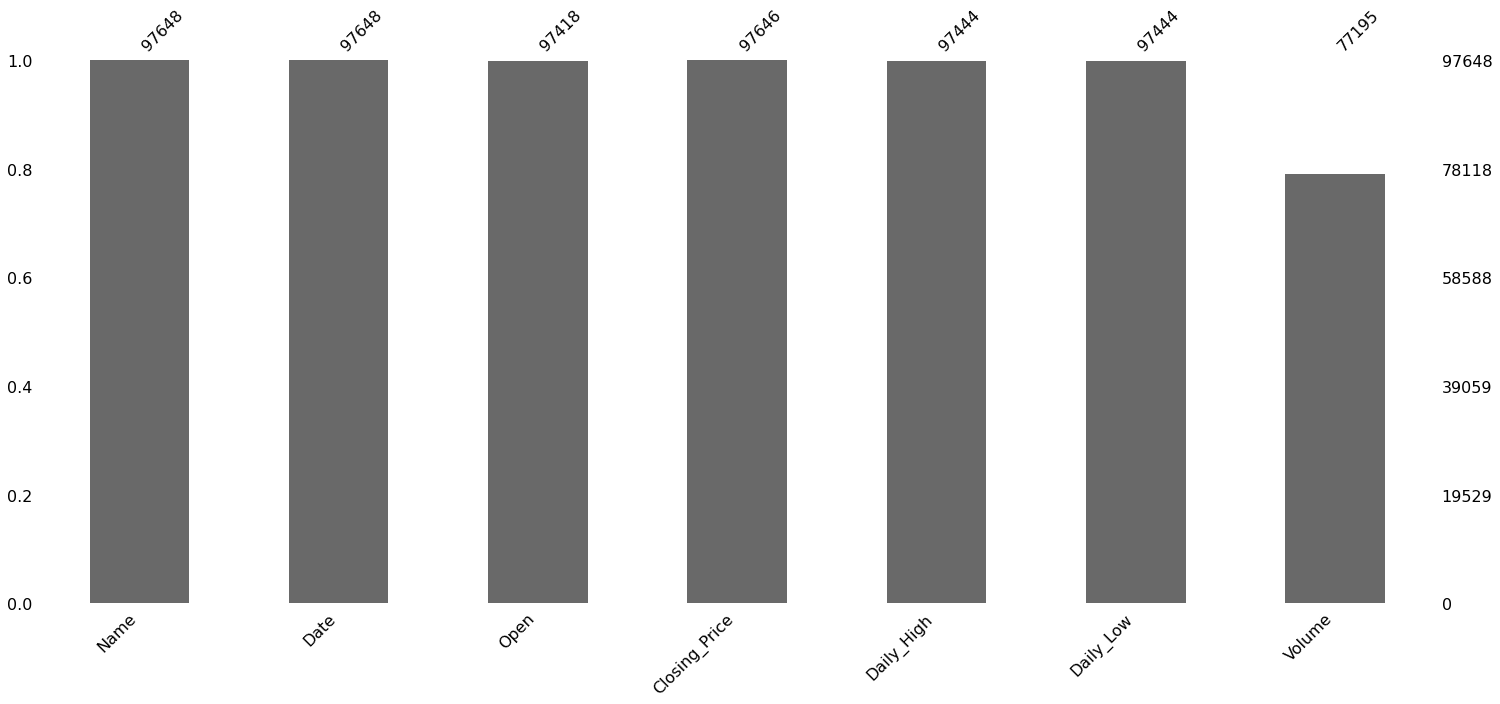

In [ ]:
#add your code
import missingno as msno


msno.bar(df)

## <font color = 'Orange'> Find reasons for the missing values</font> 


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

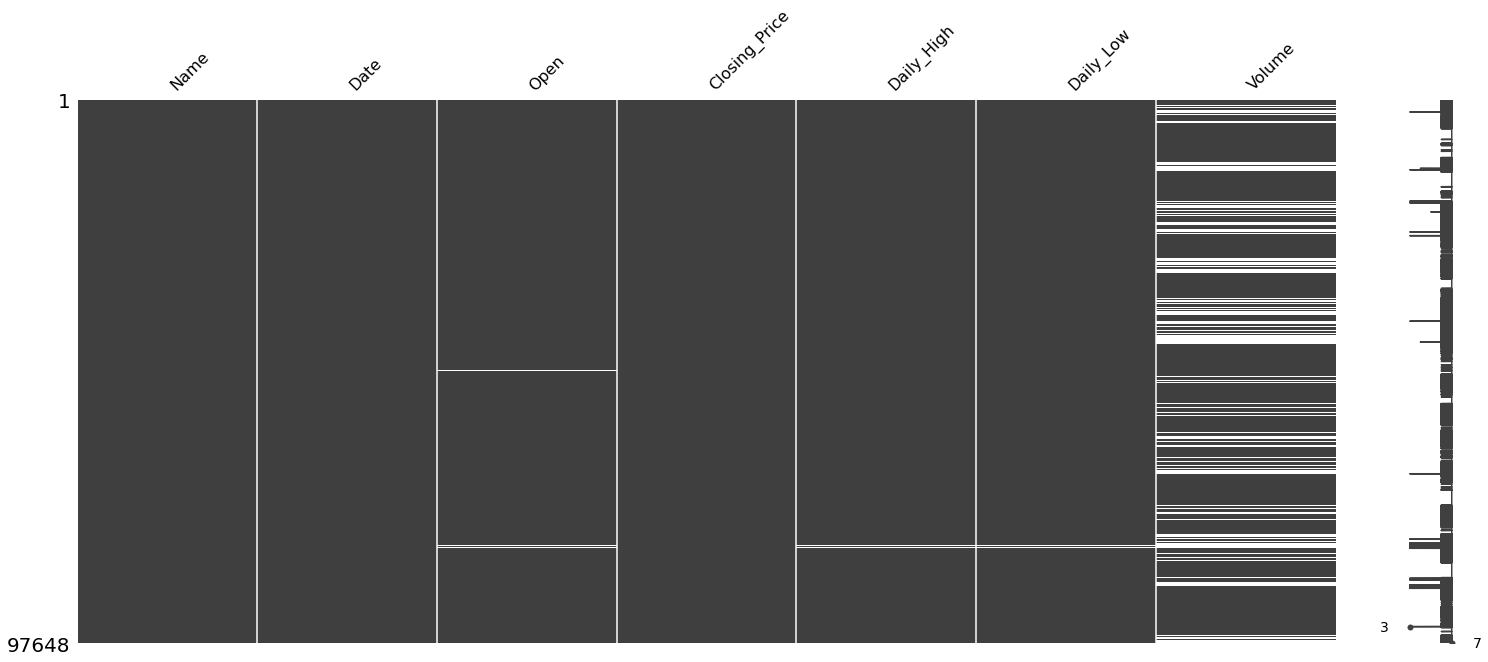

In [ ]:
#add your code
msno.matrix(df)

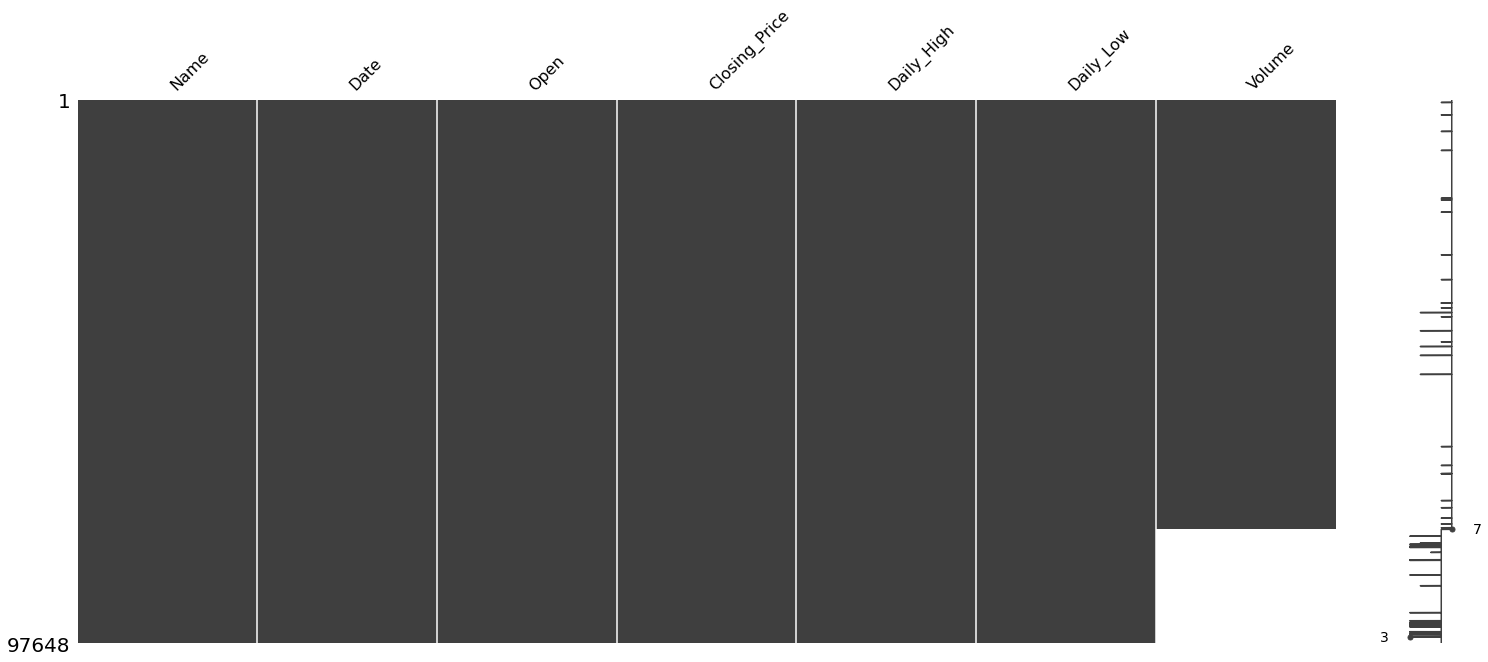

In [ ]:
msno.matrix(df.sort_values('Volume'))

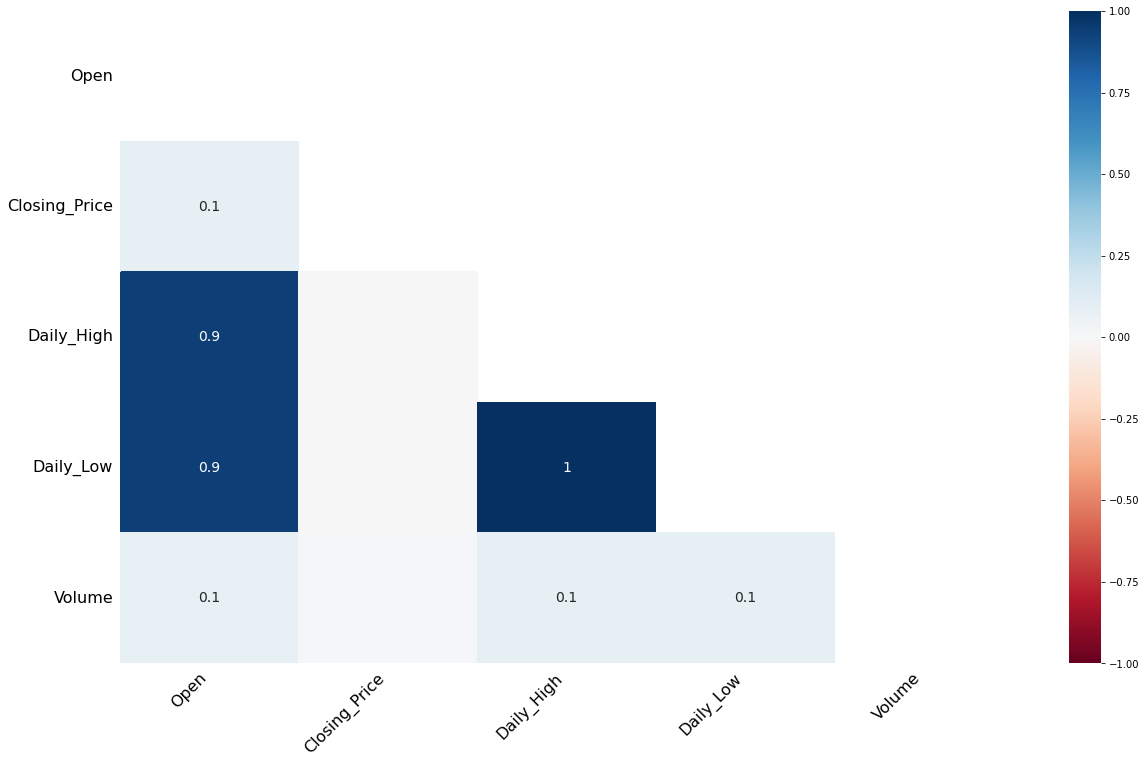

In [ ]:
msno.heatmap(df)

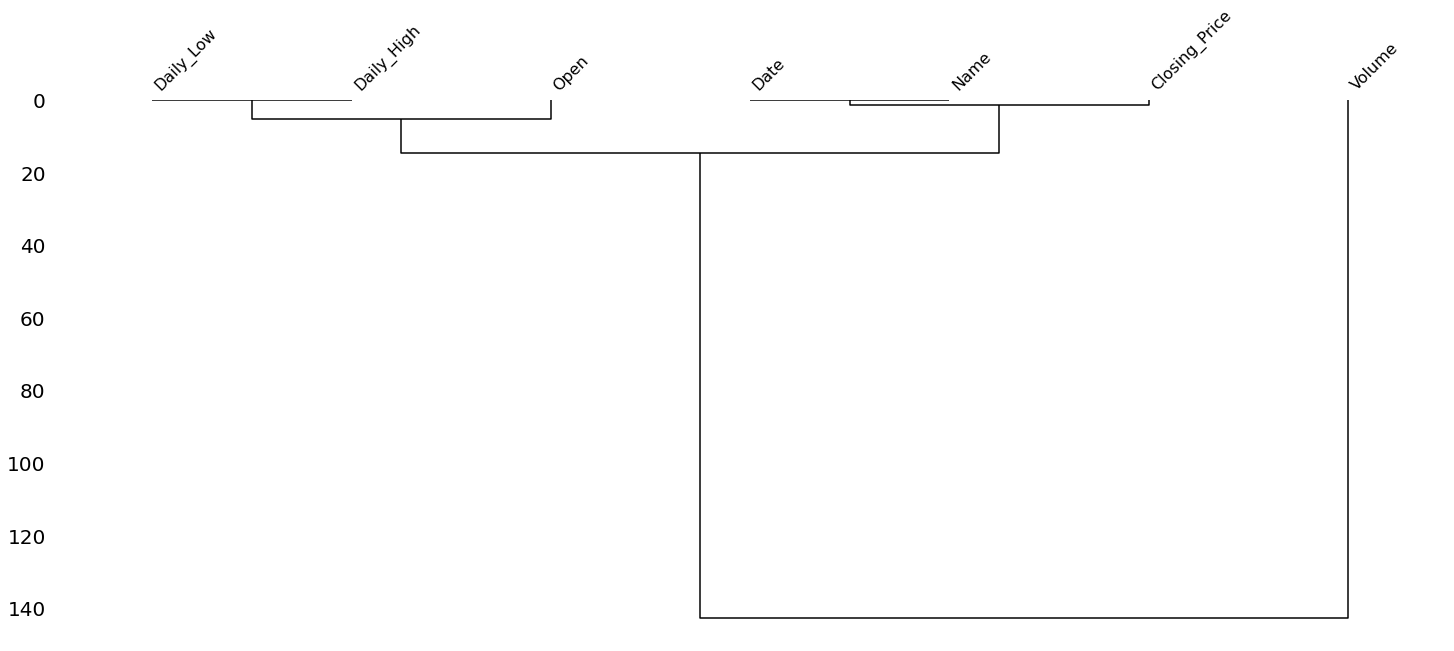

In [ ]:
msno.dendrogram(df)

Write the reasons for the missing values

*write here ..*

We can notice that when daily_high is missing, Daily_Low is missing too nearly all the time.

## <font color = 'Orange'>Handle the missing values</font>

After you observed the data, the main goal is to know how the columns depend one to another. Therefore, the next step is to select one of the techniques of Machine Learning: Linear Regression, KNN Classification or Logistic Regression that you will use for handling the missing values. You don't need to use the whole dataset for detecting the missing values in one column, you can use a subset of columns that are making the prediction of the target missing value. 


In [ ]:
df['Volume']

0         67.0
1        250.0
2         37.0
3        336.0
4        415.0
         ...  
97643      NaN
97644      NaN
97645      NaN
97646      NaN
97647    200.0
Name: Volume, Length: 97648, dtype: float64

In [ ]:
#add your code
# k = 2
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# preprocessed_data_copy = df.copy()

# preprocessed_data_copy['Volume'] = scaler.fit_transform(preprocessed_data_copy['Volume'].to_numpy().reshape(-1, 1))

# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=k)

# preprocessed_data_copy['Volume'] = imputer.fit_transform(preprocessed_data_copy['Volume'].to_numpy().reshape(-1, 1))

# preprocessed_data_copy['Volume'].isnull().sum()


df['Name'].value_counts()



EssilorLuxottica                                               2601
Crédit Agricole                                                2601
SAFRAN                                                         2601
Publicis                                                       2601
Peugeot                                                        2601
Pernod Ricard                                                  2601
LEGRAND                                                        2601
Sodexo                                                         2601
Dassault Systèmes                                              2601
TOTAL                                                          2601
ArcelorMittal                                                  2601
Atos                                                           2601
Danone                                                         2600
Air Liquide                                                    2600
Airbus                                          

In [ ]:
df_copy = df.copy()
df.interpolate(limit_direction='both', inplace=True)

df

,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,Accor,2020-04-03,22.99,23.4,23.4,22.99,67.000000
1,Accor,2020-04-02,23.91,22.99,23.91,22.99,250.000000
2,Accor,2020-04-01,24.1,23.83,24.1,23.83,37.000000
3,Accor,2020-03-31,25.04,25.0,25.24,24.99,336.000000
4,Accor,2020-03-30,26.5,25.02,26.5,24.99,415.000000
...,...,...,...,...,...,...,...
97643,Worldline SA,2014-07-04,16.22,16.28,16.29,16.22,143.142857
97644,Worldline SA,2014-07-03,16.12,16.28,16.28,16.12,157.357143
97645,Worldline SA,2014-07-02,16.22,16.17,16.32,16.17,171.571429
97646,Worldline SA,2014-07-01,16.42,16.25,16.55,16.25,185.785714


In [ ]:
k = 2
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Closing_Price'] = df['Closing_Price'].to_numpy().reshape(-1, 1)
df['Closing_Price'] = scaler.fit_transform(df['Closing_Price'].to_numpy().reshape(-1, 1))
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=k)
df['Closing_Price'] = imputer.fit_transform(df['Closing_Price'].to_numpy().reshape(-1, 1))
df['Closing_Price'].head()

0    0.027795
1    0.027226
2    0.028392
3    0.030015
4    0.030043
Name: Closing_Price, dtype: float64

In [ ]:
k = 2
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Daily_High'] = df['Daily_High'].to_numpy().reshape(-1, 1)
df['Daily_High'] = scaler.fit_transform(df['Daily_High'].to_numpy().reshape(-1, 1))
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=k)
df['Daily_High'] = imputer.fit_transform(df['Daily_High'].to_numpy().reshape(-1, 1))
df['Daily_High'].head()

0    0.027741
1    0.028449
2    0.028713
3    0.030295
4    0.032043
Name: Daily_High, dtype: float64

In [ ]:
k = 2
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Daily_Low'] = df['Daily_Low'].to_numpy().reshape(-1, 1)
df['Daily_Low'] = scaler.fit_transform(df['Daily_Low'].to_numpy().reshape(-1, 1))
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=k)
df['Daily_Low'] = imputer.fit_transform(df['Daily_Low'].to_numpy().reshape(-1, 1))
df['Daily_Low'].head()

0    0.027482
1    0.027482
2    0.028657
3    0.030281
4    0.030281
Name: Daily_Low, dtype: float64

In [ ]:
k = 2
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Open'] = df['Open'].to_numpy().reshape(-1, 1)
df['Open'] = scaler.fit_transform(df['Open'].to_numpy().reshape(-1, 1))
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=k)
df['Open'] = imputer.fit_transform(df['Open'].to_numpy().reshape(-1, 1))
df['Open'].head()

0    0.027226
1    0.028503
2    0.028766
3    0.030071
4    0.032097
Name: Open, dtype: float64

In [ ]:
k = 2
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Volume'] = df['Volume'].to_numpy().reshape(-1, 1)
df['Volume'] = scaler.fit_transform(df['Volume'].to_numpy().reshape(-1, 1))
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=k)
df['Volume'] = imputer.fit_transform(df['Volume'].to_numpy().reshape(-1, 1))
df['Volume'].head()

0    0.066132
1    0.249499
2    0.036072
3    0.335671
4    0.414830
Name: Volume, dtype: float64

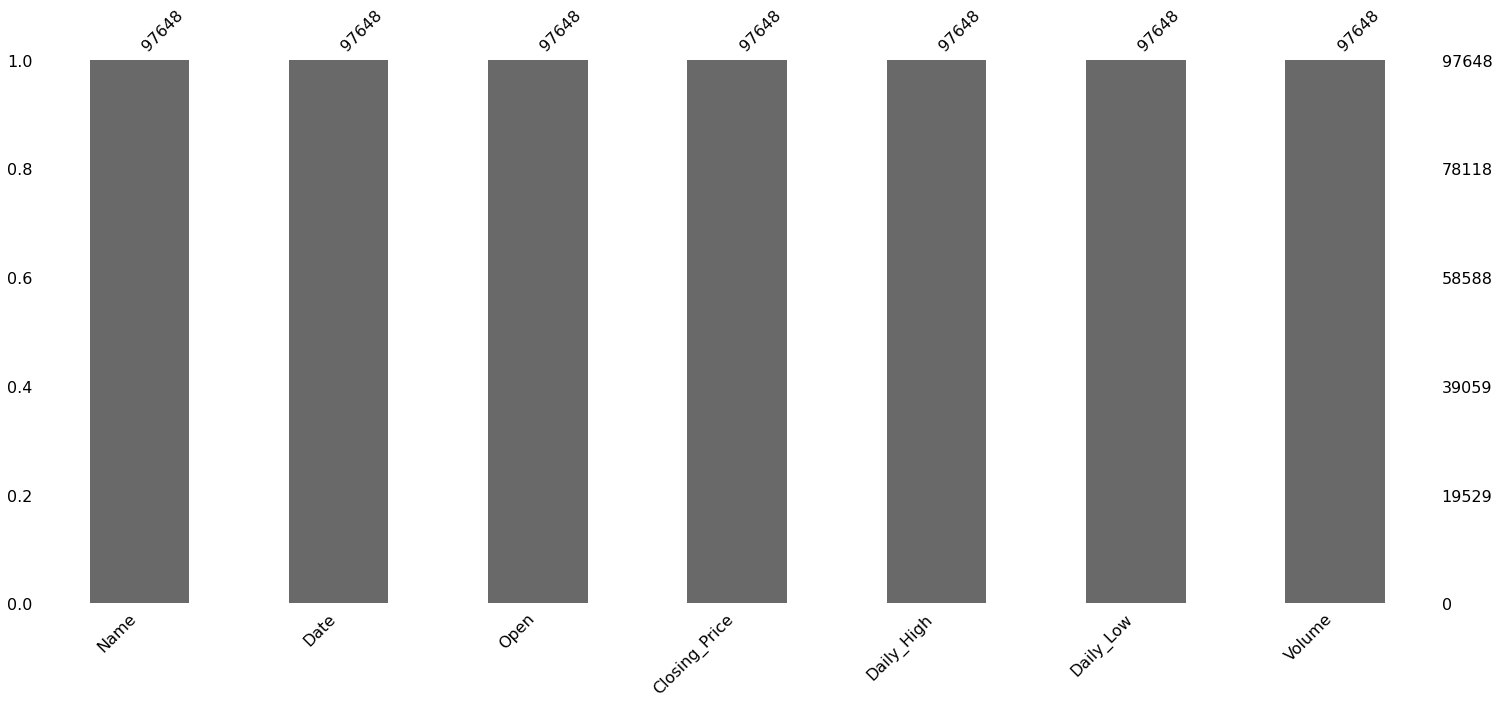

In [ ]:
msno.bar(df)

# <font color = 'Orange'> Encode non numerical values </font> 

If this is still not passed on the classes just erase these columns

In [ ]:
#add your code

from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df['Name'] = encoder.fit_transform(df['Name'])
df

encoder.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37])

# <font color = 'Orange'>Save the new Dataset(.csv) </font>

In [ ]:
#add your code

df.to_csv('/content/drive/MyDrive/VNP/lab2/result.csv')

Print the first rows of your final Dataset

In [ ]:
#add your code

df.head()

,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,1,2020-04-03,22.99,23.4,23.4,22.99,67.0
1,1,2020-04-02,23.91,22.99,23.91,22.99,250.0
2,1,2020-04-01,24.1,23.83,24.1,23.83,37.0
3,1,2020-03-31,25.04,25.0,25.24,24.99,336.0
4,1,2020-03-30,26.5,25.02,26.5,24.99,415.0


#<font color='orange'>EDA</font>

## <font color='Orange'>Find statistic elements for the continuous variables</font>
Like mean, median,  standard deviation, minimum, maximum, quantile,geometric mean

In [ ]:
#add your code
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Name       18.283549
Volume    161.857599
dtype: float64

In [ ]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Name             18.00
Open             46.88
Closing_Price    46.98
Daily_High       47.16
Daily_Low        46.64
Volume           48.00
dtype: float64

In [ ]:
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Name       10.844465
Volume    229.012307
dtype: float64

In [ ]:
df.min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Name               0
Date      2010-01-04
Volume           1.0
dtype: object

In [ ]:
df.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Name              37
Date      2020-04-03
Volume         999.0
dtype: object

In [ ]:
from scipy import stats

stats.gmean(df.iloc[:,5:6], axis=0)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:275: RuntimeWarning:

divide by zero encountered in log



array([0.])

## <font color = 'Orange'>Find the frequencies for the categorical variables </font>

In [ ]:
#add your code


# <font color = 'Orange'>Data visualization </font>

## <font color = 'Orange'>Find the distribution of given attributes</font>


Which of the attributes(columns) did you choose?


add your answer here

**Make the visualizations using histograms, bar charts, etc.**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#add your code

# df["Daily_High"].hist(bins=10)

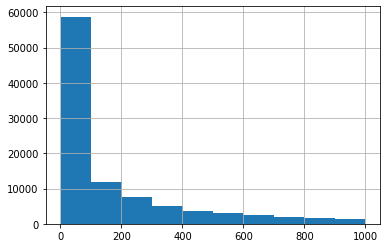

In [ ]:
df["Volume"].hist(bins=10)

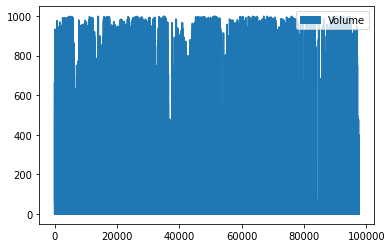

In [ ]:
df.plot.area()

In [ ]:
# df.plot.scatter(x='Daily_High', y='Volume')
# plt.xticks(rotation=90)

In [ ]:
import seaborn as sns

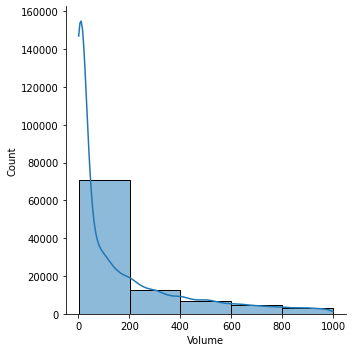

In [ ]:
sns.displot(df['Volume'], bins=5, kde=True)

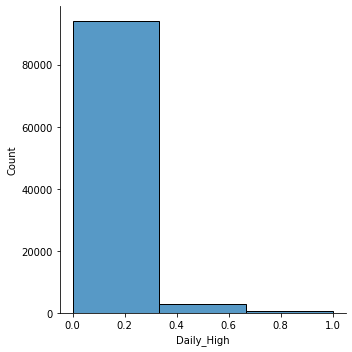

In [ ]:
sns.displot(df['Daily_High'], bins=3, kde=False)

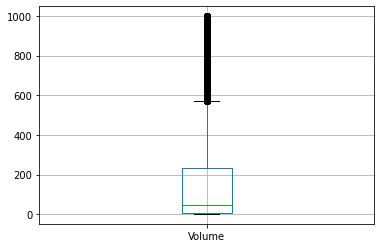

In [ ]:
df.boxplot()

In [ ]:
import plotly.express as px


In [ ]:
fig = px.bar(
    df,
    x = 'Name',
    y = 'Volume',
    # color = 'Age',
    title = 'Traded stocks per company'
    # orientation = 'h'
    # barmode = 'group'
)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fig = px.box(
    df,
    y = 'Volume'
)

fig.show()


Add as many codeboxes as you need

## <font color = 'Orange'>Visualize the relationship between the attributes</font>

In [ ]:
# df.head()

# msno.matrix(df)

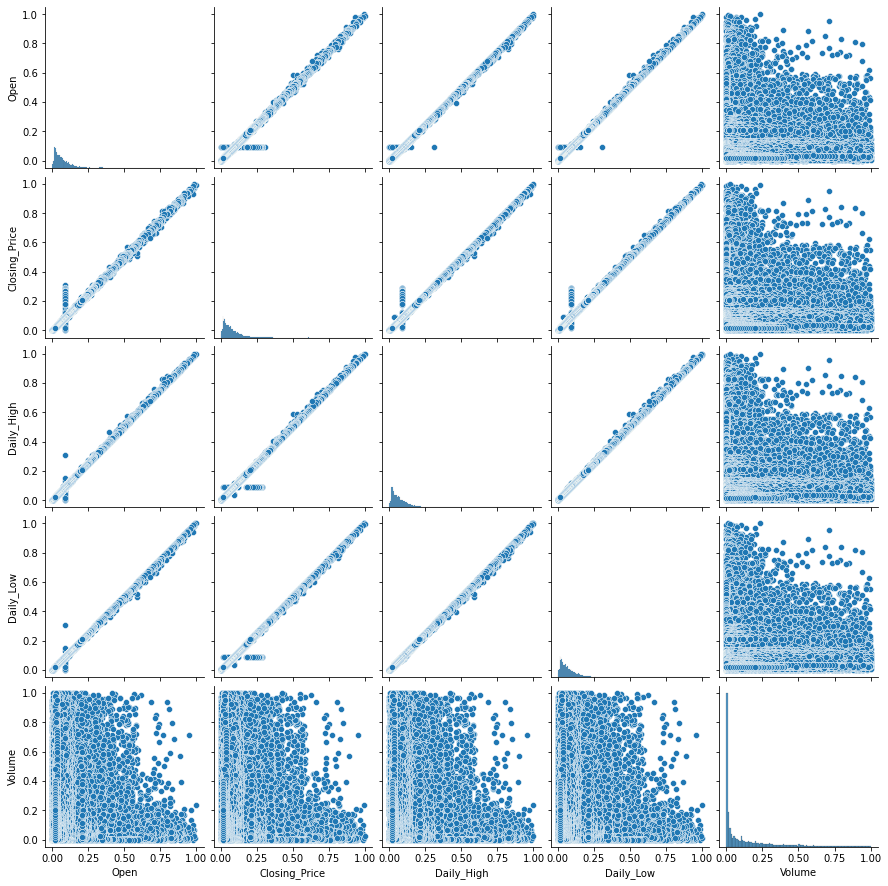

In [ ]:
#add your code 
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)

## <font color = 'Orange'>Make comparison of the columns</font>

Using multiple histograms, box-plots, scatter plots, pairplots, etc.


In [ ]:
#add your code 

# <font color = 'Orange'>EXTRA: Complex visualizations</font> 
For this you will need a basic knowladge of the Plotly library: https://plotly.com/graphing-libraries/
and for deploying the visualization as a web app you will need the Dash library for that take a look of: https://github.com/plotly/dash



In [ ]:

from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


ModuleNotFoundError: ignored